In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('../Processes/Interacciones/Interaccion_todasLasSesiones.csv')
a_r = pd.read_csv('../aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [3]:
data.shape

(443, 12)

In [4]:
train = data.copy()
#test = data.tail(3)

In [5]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Blank', 'Diagram',
       'Properties', 'Other', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [6]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']].to_numpy() #Nota

In [7]:
X

array([[  1.,   1.,   1., ...,  57.,   9.,   0.],
       [  1.,   1.,   1., ...,  36.,  14.,   0.],
       [  1.,   1.,   1., ...,  77.,  19.,   0.],
       ...,
       [  1.,   1.,   1., ..., 191.,  73.,   1.],
       [  1.,   1.,   1., ..., 220.,  17.,   1.],
       [  1.,   1.,   1., ..., 155.,  44.,   1.]])

In [8]:
X.shape

(443, 9)

### Normalizan los datos

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
X_std = scaler.fit_transform(X)

In [10]:
X_std

array([[1.        , 0.        , 1.        , ..., 0.09153713, 0.06382979,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.0552677 , 0.09929078,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.12607945, 0.13475177,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.32297064, 0.5177305 ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.37305699, 0.12056738,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.26079447, 0.31205674,
        1.        ]])

### Cluster

In [11]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [13]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


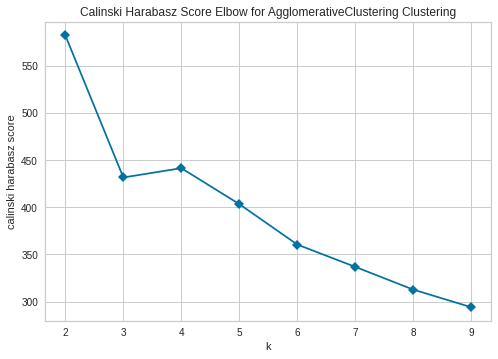

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [14]:
graficarCS(X_std,'ward')

In [ ]:
graficarCS(X_std,'ward','silhouette')

Con link= single y affinity= euclidean 


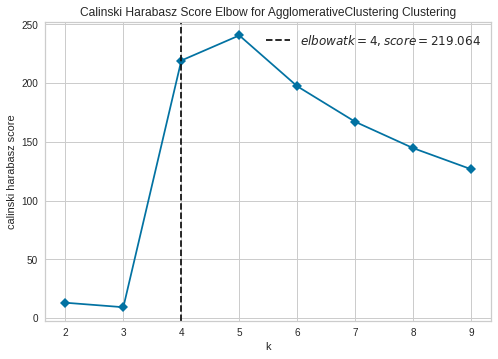

Con link= single y affinity= cosine 


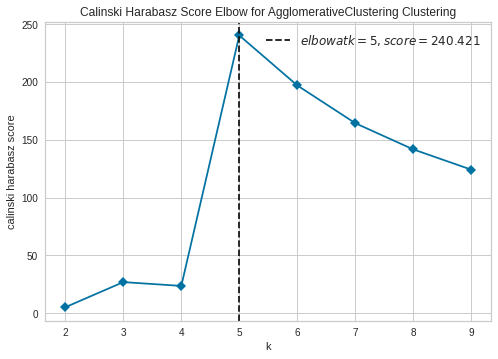

Con link= single y affinity= l1 


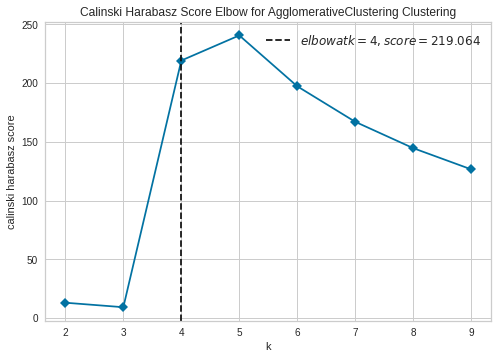

Con link= single y affinity= l2 


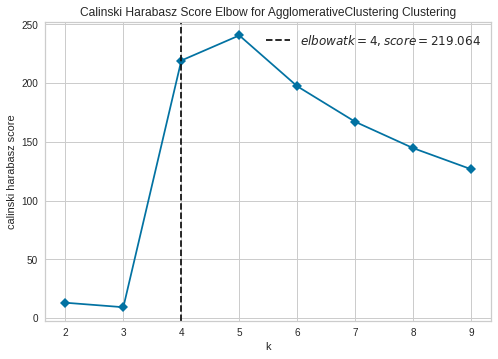

In [15]:
graficarCS(X_std,'single')

Con link= single y affinity= euclidean 


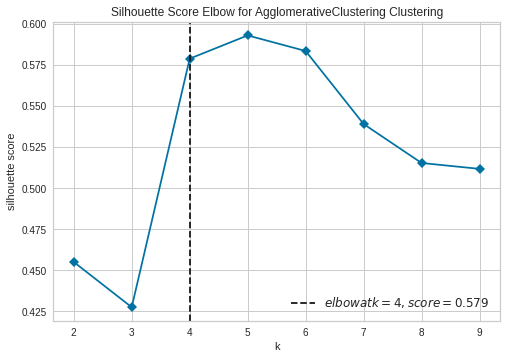

Con link= single y affinity= cosine 


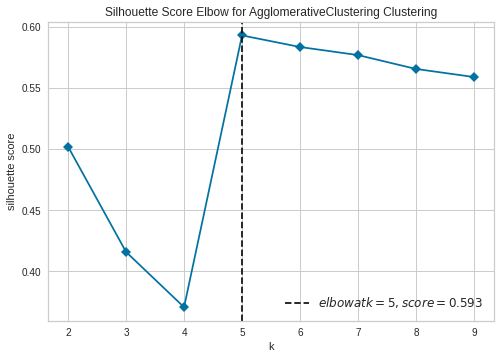

Con link= single y affinity= l1 


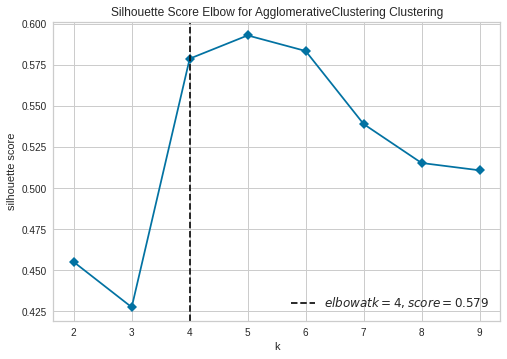

Con link= single y affinity= l2 


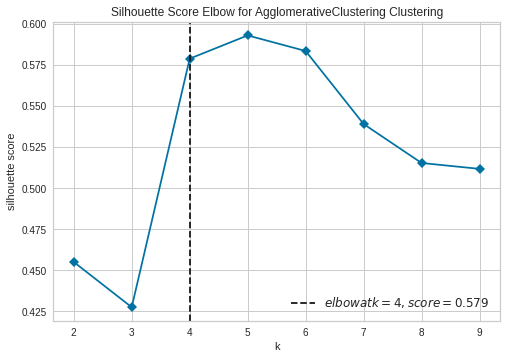

In [16]:
graficarCS(X_std,'single','silhouette')

Con link= complete y affinity= euclidean 


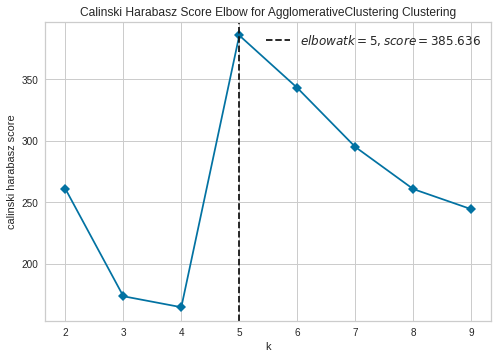

Con link= complete y affinity= cosine 


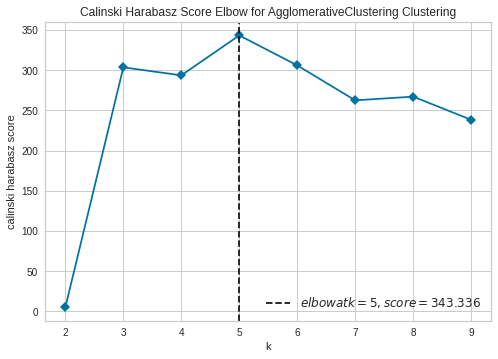

Con link= complete y affinity= l1 


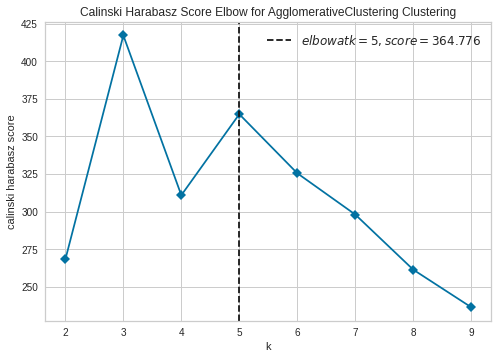

Con link= complete y affinity= l2 


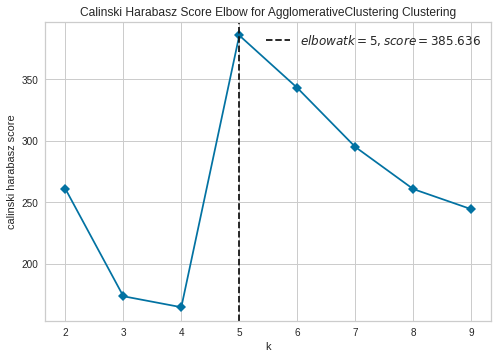

In [17]:
graficarCS(X_std,'complete')

Con link= complete y affinity= euclidean 


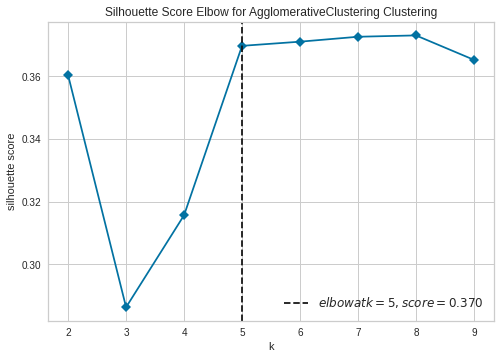

Con link= complete y affinity= cosine 


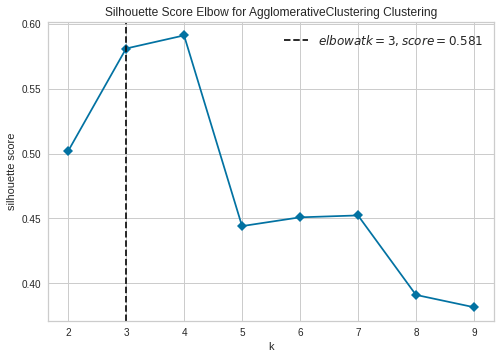

Con link= complete y affinity= l1 


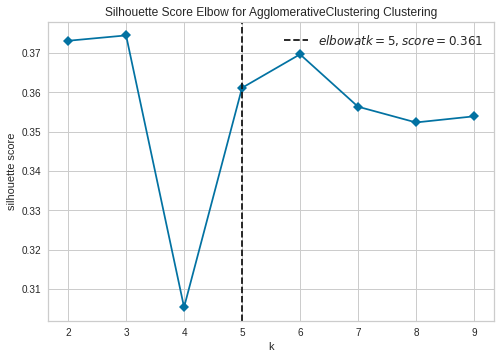

Con link= complete y affinity= l2 


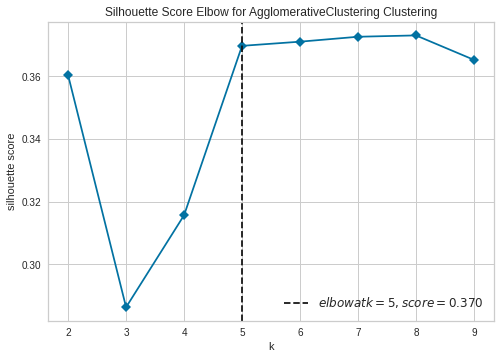

In [18]:
graficarCS(X_std,'complete','silhouette')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


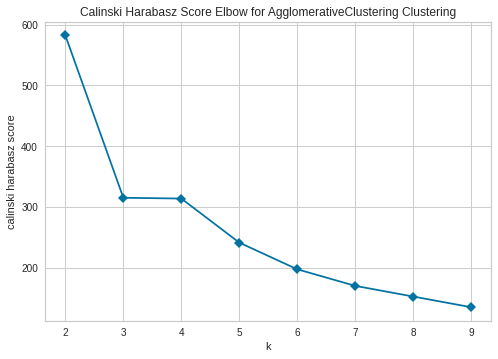

Con link= average y affinity= cosine 


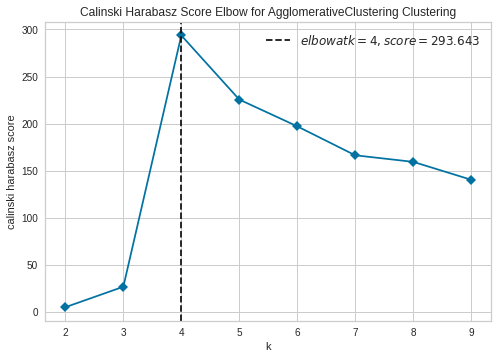

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


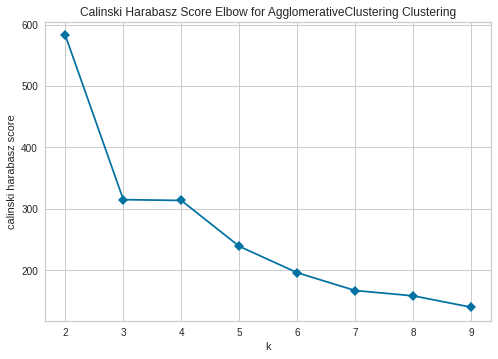

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


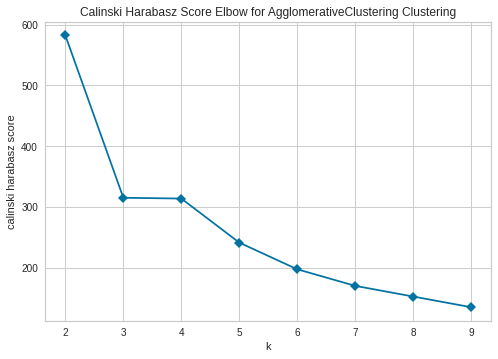

In [19]:
graficarCS(X_std,'average')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


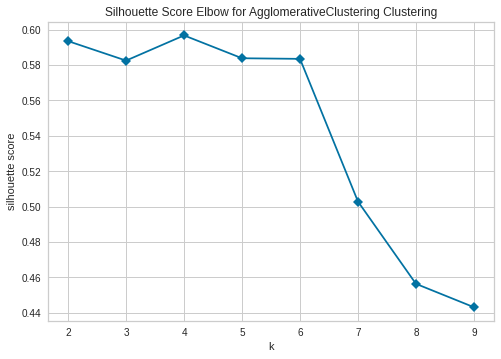

Con link= average y affinity= cosine 


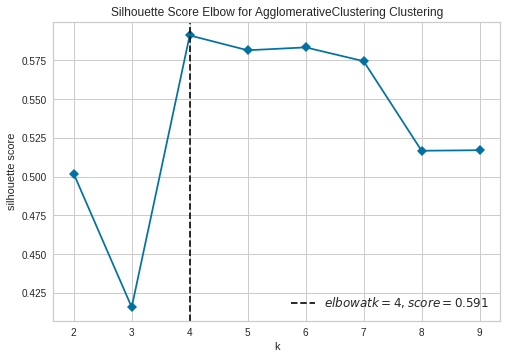

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


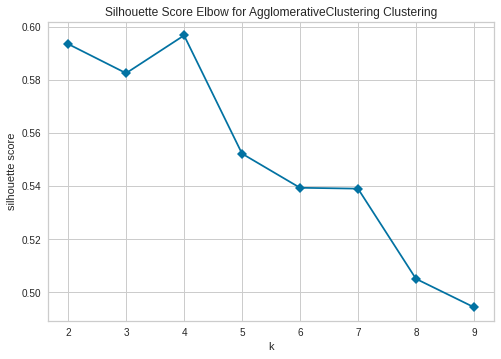

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


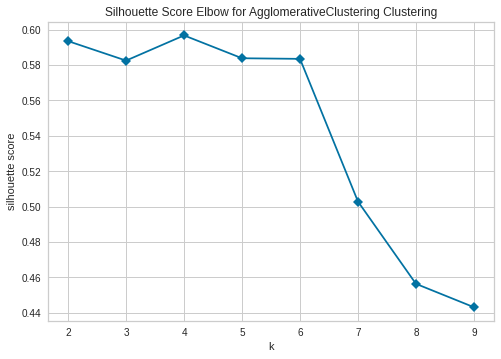

In [20]:
graficarCS(X_std,'average','silhouette')

## Clustering

In [21]:
# single{euclidean: 4, cosine:3, l1:6,l2:4}
# complete cosine 6
# average cosine 4

In [22]:
## mejores opciones obtenidas de acuerdo al silouhette score
#ward = cluster_ac(X_std, 4, 'ward', 'euclidean')
singleE = cluster_ac(X_std, 4, 'single', 'euclidean')
singleC = cluster_ac(X_std, 5, 'single', 'cosine')
singlel1 = cluster_ac(X_std, 4, 'single', 'l1')
singlel2 = cluster_ac(X_std, 4, 'single', 'l2')
completel1 = cluster_ac(X_std, 5, 'complete', 'l1')
completeE = cluster_ac(X_std, 5, 'complete', 'euclidean')
averageE = cluster_ac(X_std, 4, 'average', 'euclidean')
averageC = cluster_ac(X_std, 4, 'average', 'cosine')
averagel2 = cluster_ac(X_std, 4, 'average', 'l1')
#averagel1 = cluster_ac(X_std, 4, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [24]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [25]:
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(X_std,2),singleE,singleC,singlel1,singlel2
                                        ,completeE,averageC, completel1, averageE, averagel2]), 
                      columns=["x", "y","AGSE",'AGSC','AGSl1','AGSl2','AGCE','AGAC','AGCl1', 'AGAE','AGAl2'])

## Mostrar los resultados

In [31]:
import seaborn as sns

In [32]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(9,1 , figsize=(10, 50))
    sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[0], legend="full")
    ax[0].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSC", ax=ax[1], legend="full")
    ax[1].set_title('AGSC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl1", ax=ax[2], legend="full")
    ax[2].set_title('AGSl1')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl2", ax=ax[3], legend="full")
    ax[3].set_title('AGSl2')
    sns.scatterplot(data=res, x="x", y="y", hue="AGCE", ax=ax[4], legend="full")
    ax[4].set_title('AGCE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAC", ax=ax[5], legend="full")
    ax[5].set_title('Agglomerative Cluster Average Cosine')
    sns.scatterplot(data=res, x="x", y="y", hue="AGCl1", ax=ax[6], legend="full")
    ax[6].set_title('AGCl1')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAE", ax=ax[7], legend="full")
    ax[7].set_title('AGAE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAl2", ax=ax[8], legend="full")
    ax[8].set_title('AGAl2')

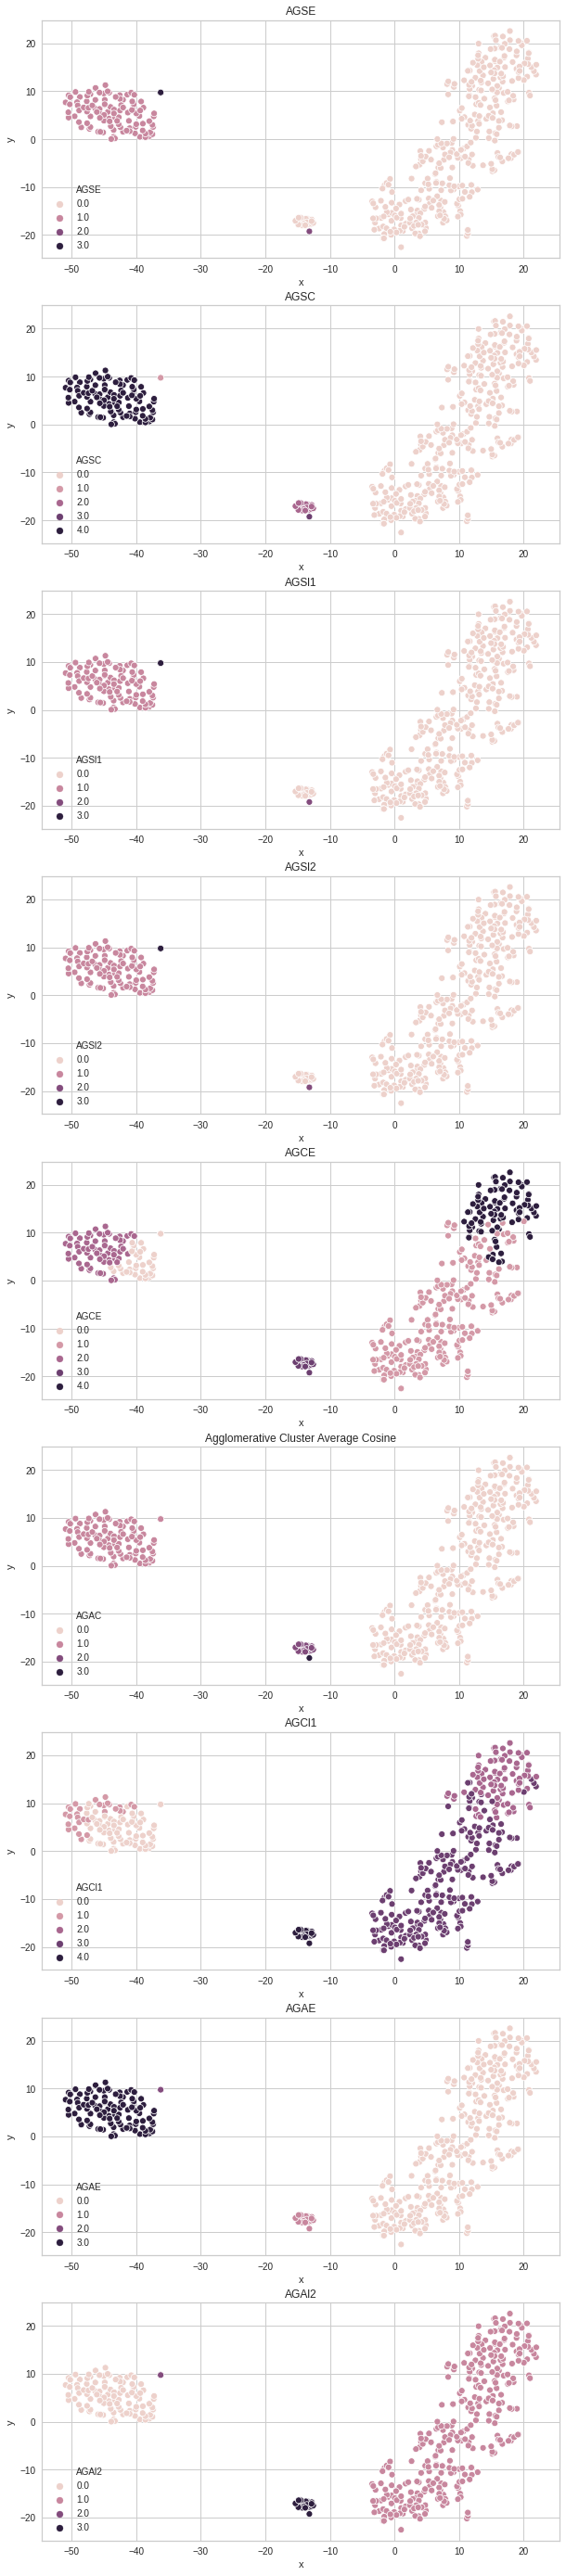

In [33]:
mostrar_resultados(results)

In [44]:
# selecciona el average Cosine 4 

### Obtiene el numero de instancias por cada cluster

In [45]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [46]:
getElements(averageC)

{0: 317, 1: 109, 2: 16, 3: 1}

In [54]:
getElements(averageE)

{0: 317, 1: 17, 2: 3, 3: 106}

In [60]:
#getElements(completeC)

## relaciona con aprobados o reprobados

In [61]:
aprobado = resultado[['aprobar']]

In [62]:
columnas = ['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']+['cluster']+list(aprobado.columns)

In [70]:
train1 = train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']]

In [73]:
union1 = pd.DataFrame(np.column_stack([train1,averageC,aprobado]),columns=columnas)
conteo1=union1.groupby(by=['cluster_AGG_AvgCos','aprobar']).count()
media1 = union1.groupby(by=['cluster_AGG_','aprobar']).mean()
conteo1.rename(columns={'Study':'Estudiantes'}, inplace =True)
conteo1= conteo1[['Estudiantes']]
pd.merge(conteo1, media1, on=['cluster_AGG_AvgCos','aprobar'])

Estudiantes     Study     Deeds  Texteditor     Diagram  \
cluster aprobar                                                            
0.0     0.0              152  1.000000  1.013158         1.0   90.710526   
        1.0              165  1.000000  1.042424         1.0  107.151515   
1.0     0.0               52  0.942308  1.000000         1.0  165.673077   
        1.0               57  1.000000  1.017544         1.0  194.508772   
2.0     0.0               14  0.000000  1.000000         1.0   68.642857   
        1.0                2  0.000000  1.000000         1.0   50.000000   
3.0     0.0                1  0.000000  1.000000         0.0   66.000000   

                 Properties       Other       Blank    Aulaweb  Fsm  
cluster aprobar                                                      
0.0     0.0       46.657895  123.085526  101.651316  36.986842  0.0  
        1.0       51.303030  143.369697  113.442424  35.145455  0.0  
1.0     0.0      154.096154  272.519231  196.500000  64.076923  1.0  
        1.0      192.912281  264.526316  201.543860  61.157895  1.0  
2.0     0.0       70.214286  142.571429   48.357143   2.857143  0.0  
        1.0       31.500000   31.000000   20.500000   0.000000  0.0  
3.0     0.0       63.000000    8.000000   36.000000   0.000000  0.0

In [66]:
union2 = pd.DataFrame(np.column_stack([X_std,averageE,aprobado]),columns=columnas)
union2.groupby(by=['cluster','aprobar']).count()
conteo2=union2.groupby(by=['cluster','aprobar']).count()
media2 = union2.groupby(by=['cluster','aprobar']).mean()
conteo2.rename(columns={'Study':'Numero_Estudiantes'}, inplace =True)
conteo2= conteo2[['Numero_Estudiantes']]
pd.merge(conteo2, media2, on=['cluster','aprobar'])

Numero_Estudiantes  Study     Deeds  Texteditor   Diagram  \
cluster aprobar                                                              
0.0     0.0                     152    1.0  0.002632    1.000000  0.269171   
        1.0                     165    1.0  0.008485    1.000000  0.317957   
1.0     0.0                      15    0.0  0.000000    0.933333  0.203165   
        1.0                       2    0.0  0.000000    1.000000  0.148368   
2.0     0.0                       3    0.0  0.000000    1.000000  0.427300   
3.0     0.0                      49    1.0  0.000000    1.000000  0.495549   
        1.0                      57    1.0  0.003509    1.000000  0.577177   

                 Properties     Other     Blank   Aulaweb  Fsm  
cluster aprobar                                                 
0.0     0.0        0.131579  0.179261  0.168655  0.262318  0.0  
        1.0        0.144966  0.210856  0.189020  0.249259  0.0  
1.0     0.0        0.198079  0.195639  0.075187  0.018913  0.0  
        1.0        0.087896  0.035826  0.028497  0.000000  0.0  
2.0     0.0        0.657061  0.457944  0.174439  0.011820  1.0  
3.0     0.0        0.427983  0.409212  0.342145  0.481546  1.0  
        1.0        0.553061  0.399574  0.341181  0.433744  1.0

In [ ]:
conteo=union2.groupby(by=['cluster','aprobar']).count()
media = union2.groupby(by=['cluster','aprobar']).mean()
conteo.rename(columns={'Study':'Numero_Estudiantes'}, inplace =True)
conteo= conteo[['Numero_Estudiantes']]
pd.merge(conteo, media, on=['cluster','aprobar'])

In [65]:
for i in range(9):
    print('Cluster: ',i,'  ',getElements(union1[(union1['cluster']==i)].aprobar))

Cluster:  0    {0.0: 152, 1.0: 165}
Cluster:  1    {0.0: 52, 1.0: 57}
Cluster:  2    {0.0: 14, 1.0: 2}
Cluster:  3    {0.0: 1}
Cluster:  4    {}
Cluster:  5    {}
Cluster:  6    {}
Cluster:  7    {}
Cluster:  8    {}


In [67]:
for i in range(6):
    print('Cluster: ',i,'  ',getElements(union2[(union2['cluster']==i)].aprobar))

Cluster:  0    {0.0: 152, 1.0: 165}
Cluster:  1    {0.0: 15, 1.0: 2}
Cluster:  2    {0.0: 3}
Cluster:  3    {0.0: 49, 1.0: 57}
Cluster:  4    {}
Cluster:  5    {}


In [35]:
union1[union1['cluster']==0]

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
7,8.842200,-0.109134,-0.390704,-1.095193,-0.859500,-0.865373,-0.429067,-0.462233,-0.122101,0.0,0.0
26,7.080965,0.330941,0.366232,-1.231105,-0.916886,-0.744492,0.352619,-0.382009,-0.122101,0.0,0.0
57,4.780577,-0.227616,0.824659,-1.093535,-0.864282,-0.574769,-0.627142,0.256137,-0.122101,0.0,0.0
64,3.091229,0.009348,-0.369382,-1.107624,-0.931232,-0.751818,-0.489197,-0.338250,-0.122101,0.0,1.0
73,3.342834,-0.244542,-0.401365,-1.106795,-0.806896,-0.704198,-0.542253,-0.236147,-0.122101,0.0,0.0
308,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.052951,0.009526,0.824998,0.292760,0.0,0.0
394,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.059057,0.009526,0.824998,0.292760,0.0,0.0
395,4.133592,-0.227616,1.251102,0.382432,-0.280855,0.718301,0.218211,-0.097578,-0.122101,0.0,1.0


In [44]:
union1.groupby(by=['cluster','aprobar']).mean() & 

Study     Deeds  Texteditor   Diagram  Properties  \
cluster aprobar                                                         
0.0     0.0      0.217443 -0.021532    0.047565 -0.672916   -0.619133   
        1.0      0.217443  0.139109    0.047565 -0.584414   -0.614392   
1.0     0.0      0.217443 -0.084287    0.047565  0.636283    0.915692   
        1.0      0.217443 -0.018780    0.047565  0.993873    1.491845   
2.0     0.0     -4.598913 -0.084287   -1.123066 -0.480921    0.209042   
        1.0     -4.598913 -0.084287    0.047565 -0.884617   -0.650870   
3.0     0.0      0.217443 -0.084287    0.047565  0.789515    0.161508   
        1.0      0.217443 -0.084287    0.047565  0.937430    0.163871   

                    Other     Blank   Aulaweb       Fsm  
cluster aprobar                                          
0.0     0.0     -0.604267 -0.553806 -0.342574 -0.571268  
        1.0     -0.496677 -0.498805 -0.486469 -0.571268  
1.0     0.0      0.960412  0.850535  0.946560  1.750491  
        1.0      0.903484  0.844142  0.707040  1.750491  
2.0     0.0     -0.042815 -0.809861 -1.377469 -0.184308  
        1.0     -1.244936 -1.229121 -1.466311 -0.571268  
3.0     0.0      0.346926  0.616167  0.535591 -0.571268  
        1.0      0.484838  0.649438  0.438605 -0.571268

In [37]:
union2.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,-0.187147,-0.150817,0.556461,0.905151,0.924861,0.068212,0.040647,-0.059861,0.253286,0.470149
1.0,-0.130214,-0.228885,-0.370448,-0.259212,-0.342546,-0.232362,1.566001,-0.280270,-0.119508,0.475000
2.0,-0.046962,0.897712,0.047341,-0.095391,-0.090201,1.131834,0.109655,1.099829,-0.085496,0.470588
3.0,-0.346359,-0.149235,-0.339449,-0.946844,-0.860530,-0.437037,-0.424850,-0.306469,-0.120505,0.546154
4.0,2.137409,-0.181792,-0.266412,0.199404,0.080608,-0.295719,-0.220468,-0.228676,-0.117042,0.585366
5.0,-0.338054,-0.178718,-0.293175,0.388111,0.165482,-0.291535,-0.417539,-0.234796,-0.106736,0.518519
